In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Load in data

In [2]:
train_df = pd.read_csv('P:\\ds-moni\\Competitions\\nepal_data\\train_values.csv')
train_labels = pd.read_csv('P:\\ds-moni\\Competitions\\nepal_data\\train_labels.csv')

In [3]:
print(train_df.shape)
train_df.head(5)

(260601, 39)


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# no missing values
train_df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

{'whiskers': [<matplotlib.lines.Line2D at 0x1a904373070>,
 'caps': [<matplotlib.lines.Line2D at 0x1a904373730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a90436acd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a904373df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a904381190>],
 'means': []}

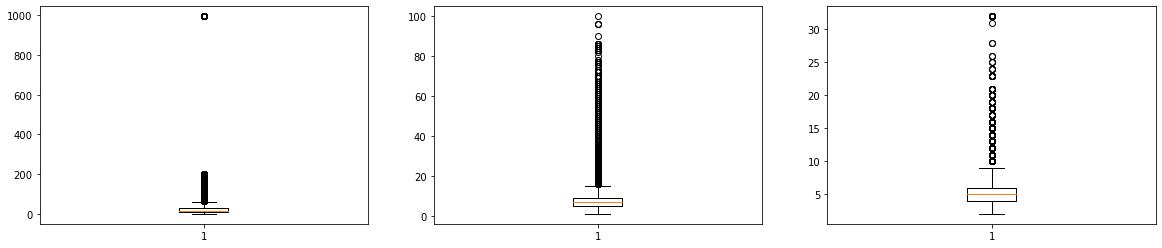

In [5]:
fig, ax = plt.subplots(1,3, figsize=(20,4))

ax[0].boxplot(train_df['age'])
ax[1].boxplot(train_df['area_percentage'])
ax[2].boxplot(train_df['height_percentage'])

EDA Plan

Numerical Features
- 1. look at distribuion of the numerical variables
- 2. correlation between numerical features

Categorical Features
- 3. Distribution of age across surface condition of the land where the building was built
- 4. Does the use of the building correspond with how big it is in terms of area % and height % as well as number of floors
- 5. Given the structure of the building - bamboo, stone, brick, etc - what is the use of the building - agriculture,gov, etc

### 1. Distribution of Numerical Features

In [9]:
numerical_vars = ['count_floors_pre_eq','age','area_percentage','height_percentage','count_families']
train_df[numerical_vars].describe()

,count_floors_pre_eq,age,area_percentage,height_percentage,count_families
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,2.129723,26.535029,8.018051,5.434365,0.983949
std,0.727665,73.565937,4.392231,1.918418,0.418389
min,1.000000,0.000000,1.000000,2.000000,0.000000
25%,2.000000,10.000000,5.000000,4.000000,1.000000
50%,2.000000,15.000000,7.000000,5.000000,1.000000
75%,2.000000,30.000000,9.000000,6.000000,1.000000
max,9.000000,995.000000,100.000000,32.000000,9.000000


- 75% of the buildings have 1 family living in them
- 25% of each variable look like outliers

In [10]:
df = train_df.merge(train_labels, on=['building_id'])
df['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

Text(0.5, 1.0, 'Number of families vs damage level for each building')

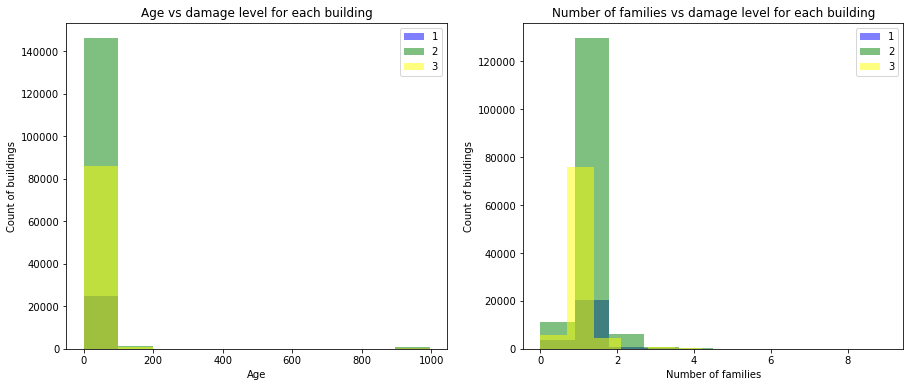

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

ax[0].hist(df[df["damage_grade"]==1]["age"], alpha=0.5, color="blue", label="1")
ax[0].hist(df[df["damage_grade"]==2]["age"], alpha=0.5, color="green", label="2")
ax[0].hist(df[df["damage_grade"]==3]["age"], alpha=0.5, color="yellow", label="3")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Count of buildings")
ax[0].legend()
ax[0].set_title("Age vs damage level for each building")

ax[1].hist(df[df["damage_grade"]==1]["count_families"], alpha=0.5, color="blue", label="1")
ax[1].hist(df[df["damage_grade"]==2]["count_families"], alpha=0.5, color="green", label="2")
ax[1].hist(df[df["damage_grade"]==3]["count_families"], alpha=0.5, color="yellow", label="3")
ax[1].set_xlabel("Number of families")
ax[1].set_ylabel("Count of buildings")
ax[1].legend()
ax[1].set_title("Number of families vs damage level for each building")

### 2. Correlation between numerical Features

[Text(0, 0.5, 'count_floors_pre_eq'),
 Text(0, 1.5, 'age'),
 Text(0, 2.5, 'area_percentage'),
 Text(0, 3.5, 'height_percentage'),
 Text(0, 4.5, 'count_families')]

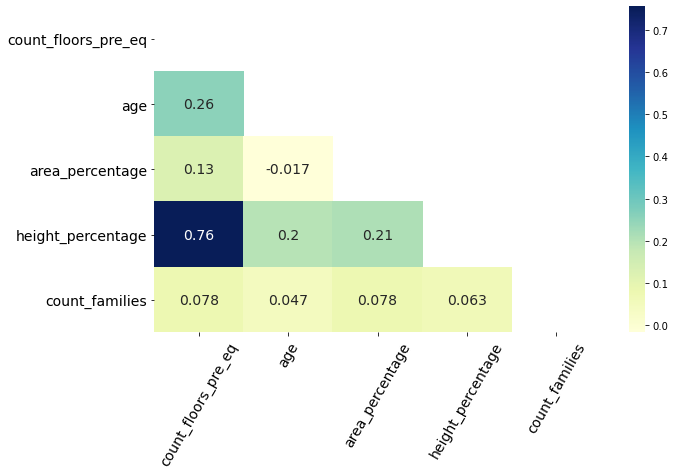

In [12]:
num_corr = train_df[numerical_vars].corr(method='spearman')
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.heatmap(num_corr, annot=True, annot_kws={"size": 14}, cmap="YlGnBu", mask=mask)
ax.set_xticklabels(num_corr.columns, fontsize=14, rotation=60)
ax.set_yticklabels(num_corr.columns, fontsize=14)

- hegiht of the building is fairly well correlated with the number of floors

### 3. Distribution of age across surface condition of the land where the building was built

<AxesSubplot:xlabel='land_surface_condition', ylabel='age'>

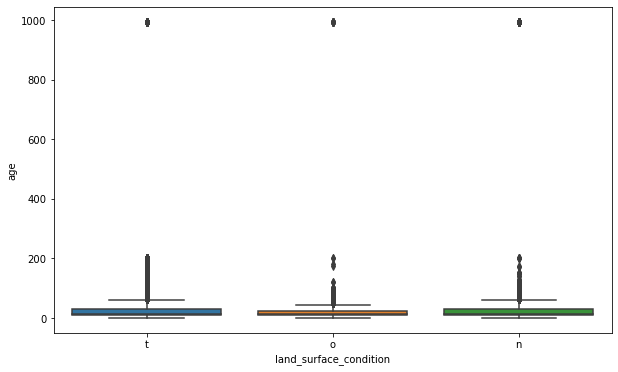

In [13]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

sns.boxplot(x="land_surface_condition", y="age", data=train_df)

- a few outliers - let's drop them and re-do the boxplot

<AxesSubplot:xlabel='land_surface_condition', ylabel='age'>

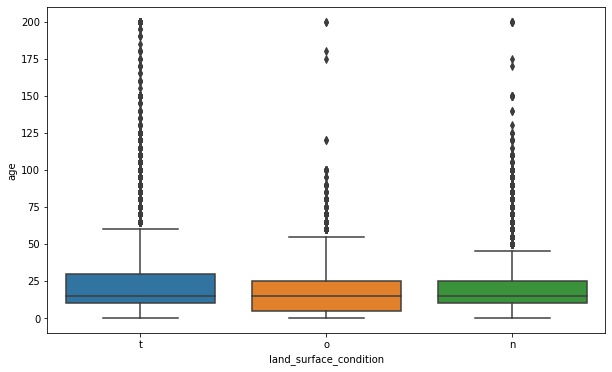

In [14]:
train_df1 = train_df[train_df['age']<=500].copy()

fig, ax = plt.subplots(1,1, figsize=(10,6))

sns.boxplot(x="land_surface_condition", y="age", data=train_df1)

- age is not related to what the land surface condition of the building is
    - it doesn't matter how old the building it might have any condition

### 4. Does the use of the building correspond with how big it is in terms of area % and height % as well as number of floors and family count

In [15]:
train_df1[[x for x in train_df1.columns if 'secondary' in x]]['has_secondary_use'].value_counts()

0    230209
1     29002
Name: has_secondary_use, dtype: int64

In [16]:
secondary_use_build = train_df1[[x for x in train_df1.columns if 'has_secondary_use_' in x]+['building_id','area_percentage','height_percentage','count_floors_pre_eq','count_families']].copy()

#
secondary_use_build.columns = secondary_use_build.columns.str.replace('has_secondary_use_','')

secondary_use_build1 = pd.melt(secondary_use_build,  
                    var_name='secondary_use',
                    id_vars = ['building_id','area_percentage','height_percentage','count_floors_pre_eq','count_families'],
                    ignore_index=False)

secondary_use_build2 = secondary_use_build1[secondary_use_build1['value']==1].reset_index(drop=True)
secondary_use_build2

,building_id,area_percentage,height_percentage,count_floors_pre_eq,count_families,secondary_use,value
0,333020,9,5,2,1,agriculture,1
1,793397,7,5,3,0,agriculture,1
2,973909,11,5,3,1,agriculture,1
3,552720,10,5,2,1,agriculture,1
4,961851,13,9,3,2,agriculture,1
...,...,...,...,...,...,...,...
29554,952382,6,4,2,1,other,1
29555,498666,14,5,2,1,other,1
29556,492007,10,4,2,1,other,1
29557,655553,7,5,2,1,other,1


<AxesSubplot:xlabel='secondary_use', ylabel='area_percentage'>

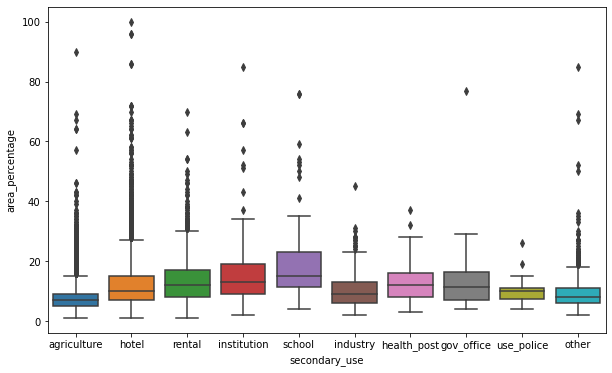

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

sns.boxplot(data=secondary_use_build2, x='secondary_use', y='area_percentage')

<AxesSubplot:xlabel='secondary_use', ylabel='height_percentage'>

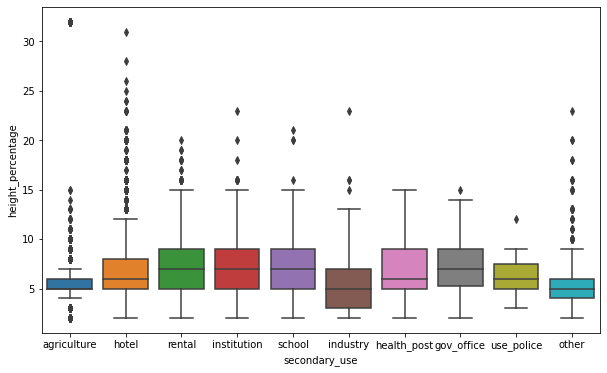

In [18]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

sns.boxplot(data=secondary_use_build2, x='secondary_use', y='height_percentage')

<AxesSubplot:xlabel='secondary_use', ylabel='count_floors_pre_eq'>

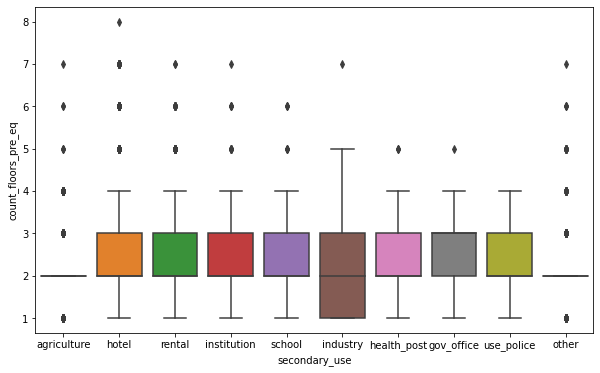

In [19]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

sns.boxplot(data=secondary_use_build2, x='secondary_use', y='count_floors_pre_eq')

**Most of the buildings used for agriculture have 2 floors**

In [20]:
secondary_use_build2[secondary_use_build2['secondary_use']=='agriculture']['count_floors_pre_eq'].value_counts()

2    11127
3     3663
1     1860
4       48
5        3
6        2
7        1
Name: count_floors_pre_eq, dtype: int64

<AxesSubplot:xlabel='secondary_use', ylabel='count_families'>

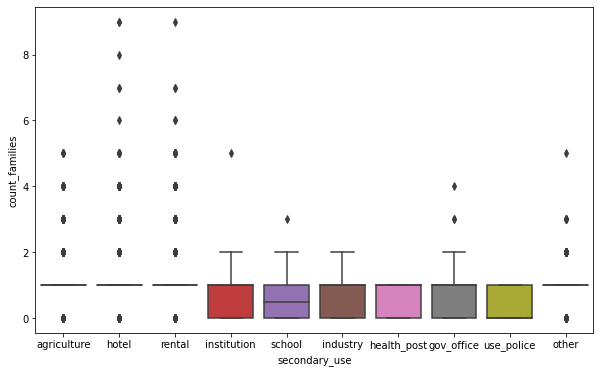

In [21]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

sns.boxplot(data=secondary_use_build2, x='secondary_use', y='count_families')

**There is 1 family in most of the buildings used for agriculture**

### 5. Given the structure of the building - bamboo, stone, brick, etc - what is the use of the building - agriculture,gov, etc

In [117]:
superstructure = train_df1[[x for x in train_df1.columns if 'has_superstructure_' in x]].copy()
use = train_df1[[x for x in train_df1.columns if 'has_secondary_use_' in x]].copy()

superstructure.columns = superstructure.columns.str.replace('has_superstructure_','')
use.columns = use.columns.str.replace('has_secondary_use_','')

In [118]:
superstructure_use = pd.DataFrame()
superstructure_use['superstructure'] = pd.get_dummies(superstructure).idxmax(1)
superstructure_use['use'] = pd.get_dummies(use).idxmax(1)
superstructure_use['values'] = np.ones(len(test))

superstructure_use_pivoted = pd.pivot_table(data=superstructure_use, values='values', columns='superstructure', index='use', aggfunc=np.sum).fillna(0)

In [119]:
superstructure_use_pivoted

superstructure,adobe_mud,bamboo,cement_mortar_brick,cement_mortar_stone,mud_mortar_brick,mud_mortar_stone,other,rc_engineered,rc_non_engineered,stone_flag,timber
use,,,,,,,,,,,
agriculture,22067.0,1025.0,12908.0,1899.0,7725.0,185081.0,313.0,1652.0,2710.0,2530.0,9003.0
gov_office,1.0,0.0,6.0,3.0,0.0,13.0,0.0,8.0,3.0,3.0,1.0
health_post,1.0,0.0,10.0,1.0,3.0,24.0,0.0,4.0,5.0,0.0,1.0
hotel,598.0,19.0,1851.0,403.0,499.0,3326.0,24.0,579.0,1108.0,116.0,187.0
industry,29.0,0.0,59.0,7.0,29.0,113.0,2.0,4.0,17.0,0.0,19.0
institution,11.0,0.0,72.0,11.0,5.0,61.0,0.0,32.0,42.0,3.0,7.0
other,39.0,3.0,50.0,15.0,20.0,588.0,2.0,19.0,16.0,5.0,17.0
rental,155.0,3.0,648.0,126.0,136.0,405.0,0.0,280.0,300.0,12.0,22.0
school,5.0,0.0,29.0,5.0,2.0,21.0,0.0,11.0,17.0,2.0,2.0


Text(0.5, 1.0, 'Proportions of superstructures by Secondary Use')

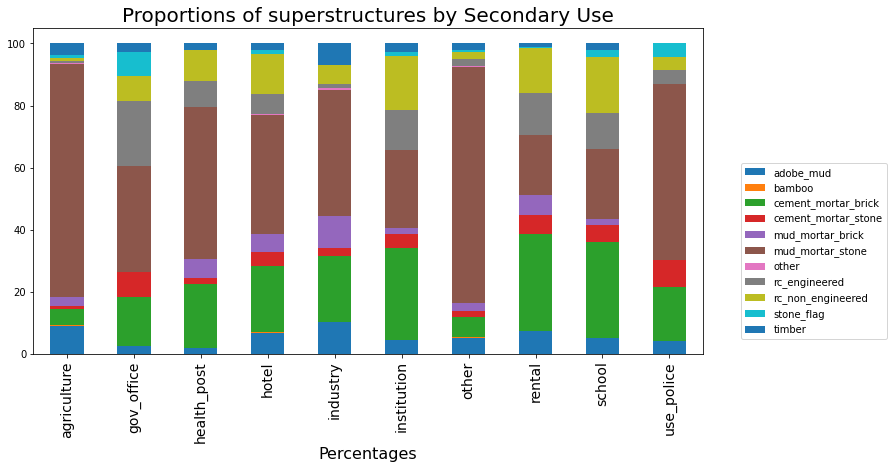

In [141]:
stacked_data = superstructure_use_pivoted.apply(lambda x: x*100/sum(x), axis=1)

fig, ax = plt.subplots(1,1, figsize=(12,6))

stacked_data.plot(kind="bar", stacked=True,ax=ax)
ax.legend(bbox_to_anchor = (1.05, 0.6))
ax.set_xticks(np.arange(0,10))
ax.set_xticklabels(superstructure_use_pivoted.index.tolist(), size=14)
ax.set_xlabel('Secondary Use', size=16)
ax.set_xlabel('Percentages', size=16)
ax.set_title('Proportions of superstructures by Secondary Use', size=20)

**Most buildings are built from Mud Mortar - Brick $in$ $brown$**